In [31]:
from pauls_functions_advanced import *
import pandas as pd
from sklearn.model_selection import train_test_split
from interpretableai import iai
from sklearn.metrics import accuracy_score
from pauls_functions_advanced import *
from joblib import Parallel, delayed
from scipy.stats import bernoulli
from sklearn.linear_model import LinearRegression

In [34]:
names = ['Reg-CART','CART','ORT','OCT','ORT-H','OCT-H']

iters = 50

accuracies = {i: {} for i in range(iters)}

for i in range(iters):

    ## Create artificial data set with
    n = 2000
    x1 = np.random.normal(loc = 0,scale=1, size=n)
    x2 = np.random.normal(loc=0, scale=1, size=n)
    x3 = np.random.normal(loc=0, scale=1, size=n)
    x4 = np.random.normal(loc=0, scale=1, size=n)
    x5 = np.random.normal(loc = 0,scale=1, size=n)
    x6 = np.random.normal(loc=0, scale=1, size=n)
    x7 = np.random.normal(loc=0, scale=1, size=n)
    x8 = np.random.normal(loc=0, scale=1, size=n)
    
    y = 0.15*x2 + 0.2*x3 + (x2 < -0.1) * (x3 > -0.5)* (x4 < -1) + (x1 < 0.5) * (x5 < 0.7)* (x6 > -0.8) * (x7 > -0.5) + np.random.normal(0, 0.1, size = n)

    y_bar = 0.15*x2 + 0.2*x3 + (x2 < -0.1) * (x3 > -0.5)* (x4 < -1) + (x1 < 0.5) * (x5 < 0.7)* (x6 > -0.8)* (x8 > -0.5)

    y = y_bar

    simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 
                                    'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8,
                                    'y': y, 'y_bar': y_bar})

    features = simulated_data[[f'x{i}' for i in range(1, 9)]]
    diagnosis = simulated_data['y']
    orig_cols = simulated_data.columns

    X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size = 0.2, random_state=i)

    models, performance = generate_tree(X_train, y_train, X_test, y_test, 
                                        n_num=2, feat_size=8,  max_iter_hy=2, 
                                        depth_bi=3, depth_hy=3, complexity_bi=0.001, 
                                        complexity_hy=0.001, depth_grid_bi=False, depth_grid_hy=False, 
                                        Reg_CART=True, ORT=True, ORT_H=False, 
                                        Clas_CART=False, OCT=False, OCT_H=False)
    
    act_name = []
    act_rules = []
    for model,name in zip(models,names):
        if not not model:
            act_name += [name]
            act_rules += [model]

    datasets = gen_train_and_test_features(act_rules, act_name, X_train, X_test)

    log_reg_acc = linear_regression_pipeline(X_train, X_test, y_train, y_test)

    accuracies[i]["Linear Regression"] = log_reg_acc
    accuracies[i]["Reg CART"] = performance['Reg CART'].iloc[0]
    accuracies[i]["ORT"] = performance['ORT'].iloc[0]

    for model in datasets.keys():

        X_train_rules_and_features, X_test_rules_and_features = datasets[model][0]
        X_train_only_rules, X_test_only_rules = datasets[model][1]

        only_rules_acc = linear_regression_pipeline(X_train_only_rules, X_test_only_rules, y_train, y_test)

        rules_and_features_acc = linear_regression_pipeline(X_train_rules_and_features, X_test_rules_and_features, y_train, y_test)

        accuracies[i][model + "_rules_and_features"] = rules_and_features_acc
    
    accuracies[i]["True Model"] = r2_score(y_test, simulated_data.loc[y_test.index, "y_bar"])



    ----------------------------------------- section 1 -----------------------------------------
Regression CART mean performance:  0.3896953599046332


Regression ORT performance:  0.430540654982249




    ----------------------------------------- section 2 -----------------------------------------
Regression CART mean performance:  0.3896953599046332


Regression ORT performance:  0.430540654982249




    ----------------------------------------- section 1 -----------------------------------------
Regression CART mean performance:  0.5489698120202079


Regression ORT performance:  0.530036429100786




    ----------------------------------------- section 2 -----------------------------------------
Regression CART mean performance:  0.5489698120202079


Regression ORT performance:  0.530036429100786




    ----------------------------------------- section 1 -----------------------------------------
Regression CART mean performance:  0.5709166467477778


Regression ORT performan

In [35]:
accuracies = pd.DataFrame(accuracies).T.rename(columns = {"CART_rules": "CART", "CART_rules_and_features": "RuleFit", "OCT_rules": "OCT", "OCT_rules_and_features": "ORRFA", "Logistic Regession": "Log. Regression"})

In [36]:
accuracies = accuracies.rename(columns = {"Logistic Regression": "Log. Regression"})

In [38]:
accuracies

,Linear Regression,Reg CART,ORT,Reg-CART_rules_and_features,ORT_rules_and_features,True Model
0,0.430844,0.389695,0.430541,0.586035,0.687980,1.0
1,0.383839,0.548970,0.530036,0.678062,0.666183,1.0
2,0.419839,0.570917,0.570583,0.750592,0.750289,1.0
3,0.444165,0.539298,0.536063,0.716710,0.697616,1.0
4,0.362893,0.518637,0.510686,0.671324,0.676280,1.0
5,0.476939,0.581922,0.581922,0.778019,0.778019,1.0
6,0.458359,0.452509,0.531554,0.582081,0.715196,1.0
7,0.455381,0.535922,0.536374,0.715863,0.715937,1.0
8,0.414135,0.513398,0.513957,0.683971,0.692976,1.0
9,0.333449,0.371198,0.449971,0.499688,0.649942,1.0


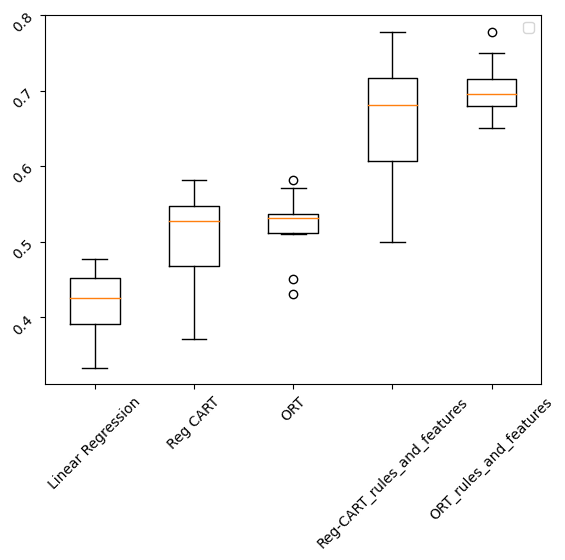

In [42]:
fig, ax = plt.subplots()


ax.boxplot(accuracies.iloc[:,:-1])
ax.set_xticklabels(accuracies.columns[:-1])

ax.legend()
ax.tick_params(rotation = 45)